# More calssification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix


Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



<br>
<img src="images/Classification_evaluation.png" height = 600>
<br>
<img src="images/Classification_evaluation_1.png"  height = 600>

# Confusion matrix


In [7]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

In [37]:
import tensorflow as tf

model_A = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    #tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])
model_A.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.003),
                       metrics= ["accuracy"])
hystory_lr_A = model_A.fit( X_train,y_train, epochs= 10,verbose =0 )
model_A.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.9050


[0.5724186897277832, 0.9049999713897705]

In [38]:
from sklearn.metrics import confusion_matrix

#make predictions
y_preds = model_A.predict(X_test)

print(y_preds[:5], y_test[:5])
#create confusion matrix
confusion_matrix(y_true=y_test,y_pred=y_preds)

7/7 [==============================] - 0s 992us/step
[[0.52105194]
 [0.61228806]
 [0.5532264 ]
 [0.51251054]
 [0.45460016]] [1 1 1 1 0]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [39]:
import numpy as np
#transfrom the prediction in binaries
y_preds_binary = np.where(y_preds<0.5, 0 ,1)
y_preds_binary[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [40]:
confusion_matrix(y_test,y_preds_binary)

array([[101,   0],
       [ 19,  80]], dtype=int64)

In [41]:
y_predi_train = model_A.predict(X_train)

25/25 [==============================] - 0s 1ms/step


In [42]:
confusion_matrix(y_train, np.round( y_predi_train ))

array([[399,   0],
       [ 73, 328]], dtype=int64)


Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

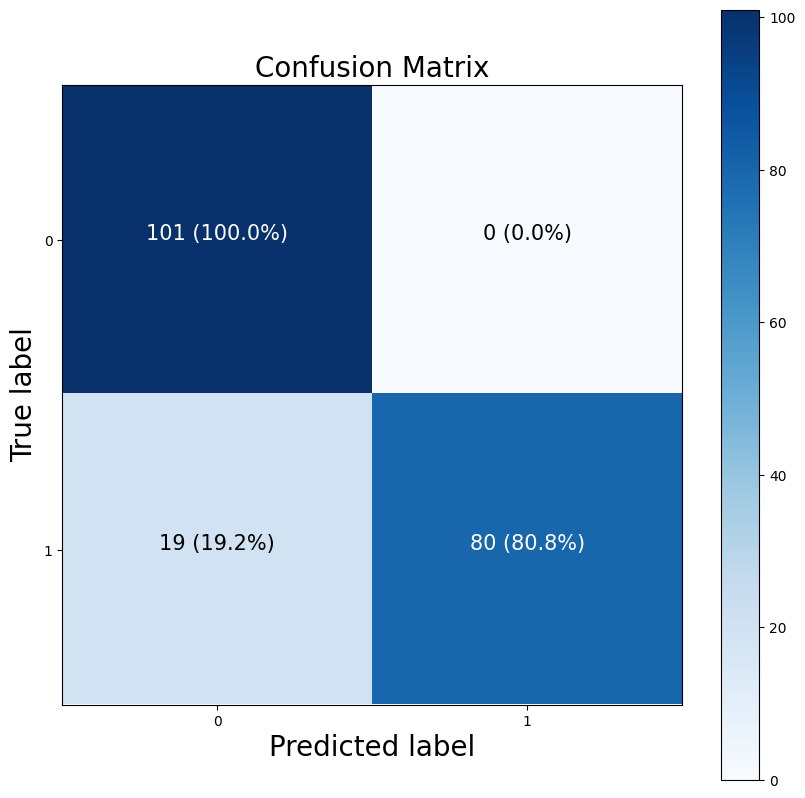

In [44]:
import matplotlib.pyplot as plt

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)